# Optimizing with batch normalization
Another well-known optimization technique for CNNs is batch normalization. This technique normalizes the inputs of the current batch before feeding it to the next layer; therefore, the mean activation for each batch is around zero and the standard deviation around one, and we can avoid internal covariate shift.<br><br>
By doing this, the input distribution of the data per batch has less effect on the network, and as a consequence the model is able to generalize better and train faster. <br><br>
In the following example, we apply batch normalization to an image dataset with 10 classes (CIFAR-10). First, we train the network architecture without batch normalization to demonstrate the difference in performance.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.callbacks import EarlyStopping
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


### Load the cifar10 datase

In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_val, y_val) = cifar10.load_data()

### Normalize the input data

In [3]:
X_train = X_train.astype('float32')/255.
X_val = X_val.astype('float32')/255.

### One-hot encode the labels

In [4]:
n_classes = 10
y_train = np_utils.to_categorical(y_train, n_classes)
y_val = np_utils.to_categorical(y_val, n_classes)

### Define the CNN architecture and output the network architecture

In [5]:
input_shape = X_train[0].shape

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
__________

### Define a callback to prevent overfitting

In [6]:
callbacks = [EarlyStopping(monitor='val_acc', patience=5, verbose=1)]

### Set network hyperparameters

In [7]:
batch_size = 256
n_epochs = 300

### Train our first model

In [8]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=n_epochs, verbose=1, validation_data=(X_val, y_val), callbacks=callbacks)

Train on 50000 samples, validate on 10000 samples
Epoch 1/300
50000/50000 [==============================] - 653s 13ms/step - loss: 1.8134 - acc: 0.3212 - val_loss: 1.4383 - val_acc: 0.4614
Epoch 2/300
50000/50000 [==============================] - 636s 13ms/step - loss: 1.3444 - acc: 0.5087 - val_loss: 1.1246 - val_acc: 0.5989
Epoch 3/300
50000/50000 [==============================] - 642s 13ms/step - loss: 1.1222 - acc: 0.5966 - val_loss: 1.1822 - val_acc: 0.5831
Epoch 4/300
50000/50000 [==============================] - 642s 13ms/step - loss: 0.9952 - acc: 0.6474 - val_loss: 0.9055 - val_acc: 0.6827
Epoch 5/300
50000/50000 [==============================] - 644s 13ms/step - loss: 0.9080 - acc: 0.6777 - val_loss: 0.8097 - val_acc: 0.7147
Epoch 6/300
50000/50000 [==============================] - 648s 13ms/step - loss: 0.8360 - acc: 0.7045 - val_loss: 0.7957 - val_acc: 0.7156
Epoch 7/300
50000/50000 [==============================] - 635s 13ms/step - loss: 0.7709 - acc: 0.7299 - val_l

### Add batch normalization to our network architecture

In [9]:
model_bn = Sequential()

model_bn.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape, padding='same'))
model_bn.add(Activation('relu'))
model_bn.add(BatchNormalization())
model_bn.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
model_bn.add(Activation('relu'))
model_bn.add(BatchNormalization())
model_bn.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model_bn.add(Dropout(0.25))

model_bn.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model_bn.add(Activation('relu'))
model_bn.add(BatchNormalization())
model_bn.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model_bn.add(Activation('relu'))
model_bn.add(BatchNormalization())
model_bn.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model_bn.add(Dropout(0.25))

model_bn.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
model_bn.add(Activation('relu'))
model_bn.add(BatchNormalization())
model_bn.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
model_bn.add(Activation('relu'))
model_bn.add(BatchNormalization())
model_bn.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model_bn.add(Dropout(0.25))

model_bn.add(Flatten())
model_bn.add(Dense(512, activation='relu'))
model_bn.add(BatchNormalization())
model_bn.add(Dropout(0.5))
model_bn.add(Dense(128, activation='relu'))
model_bn.add(Dense(n_classes, activation='softmax'))

model_bn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_bn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
__________

### Train the model that includes batchnormalization

In [10]:
 history_bn = model_bn.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=n_epochs,
          verbose=1,
          validation_data=(X_val, y_val), callbacks=callbacks)

Train on 50000 samples, validate on 10000 samples
Epoch 1/300
50000/50000 [==============================] - 841s 17ms/step - loss: 1.6458 - acc: 0.4244 - val_loss: 3.6049 - val_acc: 0.1610
Epoch 2/300
50000/50000 [==============================] - 899s 18ms/step - loss: 1.1702 - acc: 0.5816 - val_loss: 2.8794 - val_acc: 0.2465
Epoch 3/300
50000/50000 [==============================] - 757s 15ms/step - loss: 0.9783 - acc: 0.6534 - val_loss: 1.1287 - val_acc: 0.6128
Epoch 4/300
50000/50000 [==============================] - 788s 16ms/step - loss: 0.8462 - acc: 0.7022 - val_loss: 0.8321 - val_acc: 0.7130
Epoch 5/300
50000/50000 [==============================] - 1234s 25ms/step - loss: 0.7543 - acc: 0.7363 - val_loss: 0.8076 - val_acc: 0.7217
Epoch 6/300
50000/50000 [==============================] - 2484s 50ms/step - loss: 0.6946 - acc: 0.7558 - val_loss: 0.7145 - val_acc: 0.7518
Epoch 7/300
50000/50000 [==============================] - 1763s 35ms/step - loss: 0.6350 - acc: 0.7755 - va

### Plot the validation accuracy of both models to compare the performance

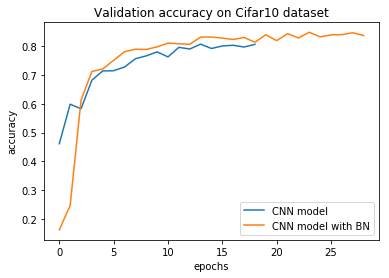

In [11]:
val_acc_bn = history_bn.history['val_acc']
val_acc = history.history['val_acc']
plt.plot(range(len(val_acc)), val_acc, label='CNN model')
plt.plot(range(len(val_acc_bn)), val_acc_bn, label='CNN model with BN')
plt.title('Validation accuracy on Cifar10 dataset')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Comparing validation accuracy of a model with and without batch normalization

In [12]:
print(max(val_acc_bn), max(val_acc))
print(len(val_acc_bn), len(val_acc))

0.8496 0.8081
29 19


As we can see, the model with batch normalization takes the leadon validation accuracy after a couple of epochs and manages to stay ahead of the model without batch normalization, with a maximum validation accuracy of 84.16%, compared to a validation accuracy of 83.19% for the model without batch normalization. The model with batch normalization also converges faster (26 epochs vs 40 epochs). However, with 25 seconds per epoch, the model with batch normalization is slightly slower per epoch than the model without batch normalization (17 seconds).